In [7]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

import QSTK.qstkutil.qsdateutil as du
import QSTK.qstkutil.tsutil as tsu
import QSTK.qstkutil.DataAccess as da

In [9]:
symbols = ["AAPL", "GLD", "GOOG", "$SPX", "XOM"]

start_date = dt.datetime(2006, 1, 1)
end_date = dt.datetime(2010, 12, 31)
timeofday = dt.timedelta(hours=16)
timestamps = du.getNYSEdays(start_date, end_date, timeofday)
timestamps[:5]

[Timestamp('2006-01-03 16:00:00'),
 Timestamp('2006-01-04 16:00:00'),
 Timestamp('2006-01-05 16:00:00'),
 Timestamp('2006-01-06 16:00:00'),
 Timestamp('2006-01-09 16:00:00')]

In [20]:
dataobject = da.DataAccess('Yahoo')
keys = ['open', 'high', 'low', 'close', 'volume', 'actual_close']

data = dataobject.get_data(timestamps, symbols, keys)
d_data = dict(zip(keys, data))

In [13]:
for s_key in keys:
    d_data[s_key] = d_data[s_key].fillna(method='ffill')
    d_data[s_key] = d_data[s_key].fillna(method='bfill')
    d_data[s_key] = d_data[s_key].fillna(1.0)
    
na_price = d_data['close'].values

## Plot prices with x-axis=timestamps

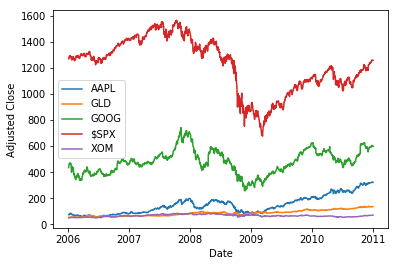

In [18]:
plt.clf()
plt.plot(timestamps, na_price)
plt.legend(symbols)
plt.ylabel('Adjusted Close')
plt.xlabel('Date')

In [21]:
# Normalize prices to start at 1 and se relative returns
na_normalized_price = na_price / na_price[0, :]

## Plot normalized prices

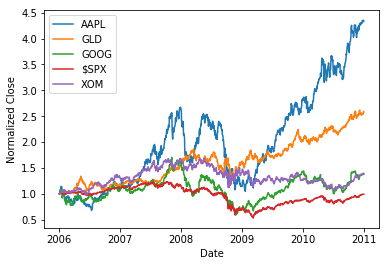

In [23]:
plt.clf()
plt.plot(timestamps, na_normalized_price)
plt.legend(symbols)
plt.ylabel('Normalized Close')
plt.xlabel('Date')

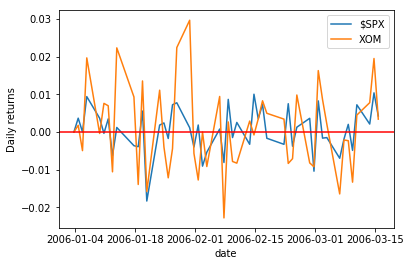

In [25]:
# copy normalized prices to new ndarray to find returns
na_rets = na_normalized_price.copy()

# calculate daily returns of the prices (inplace calculation)
tsu.returnize0(na_rets)

# plot daily returns
plt.clf()
plt.plot(timestamps[0:50], na_rets[0:50, 3])  # $SPX 50 days
plt.plot(timestamps[0:50], na_rets[0:50, 4])  # XOM
plt.axhline(y=0, color='r')
plt.legend(['$SPX', 'XOM'])
plt.ylabel('Daily returns')
plt.xlabel('date')

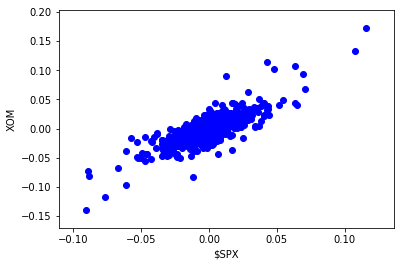

In [26]:
# scatter plot of daily returns between XOM vs $SPX
plt.clf()
plt.scatter(na_rets[:, 3], na_rets[:, 4], c='blue')
plt.ylabel('XOM')
plt.xlabel('$SPX')

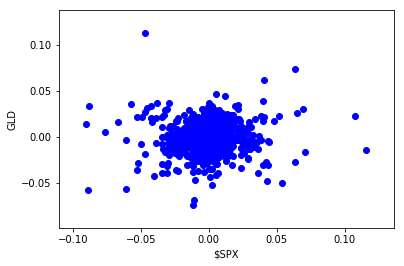

In [27]:
# scatter plot SPX vs GLD
plt.clf()
plt.scatter(na_rets[:, 3], na_rets[:, 1], c='blue')
plt.ylabel('GLD')
plt.xlabel('$SPX')
